In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow.keras

%matplotlib inline
import matplotlib.pyplot as plt  

from os import listdir
from PIL import Image
from time import time
import pandas as pd
import numpy as np

In [2]:
batch_size = 20
train_data_dir = "C:/Users/fiamm/Documents/Master_SIANI/CI/Cayetano/TrabajoFinal/data_images"
validation_data_dir = "C:/Users/fiamm/Documents/Master_SIANI/CI/Cayetano/TrabajoFinal/data_test"

train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                    target_size=(120, 90),
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

validation_generator = train_datagen.flow_from_directory(validation_data_dir,
                                                    target_size=(120, 90),
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

Found 5658 images belonging to 7 classes.
Found 2420 images belonging to 7 classes.


(90, 120, 3)


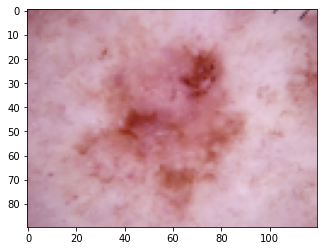

(90, 120, 3)


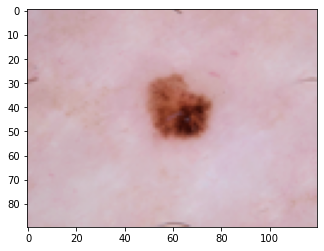

(90, 120, 3)


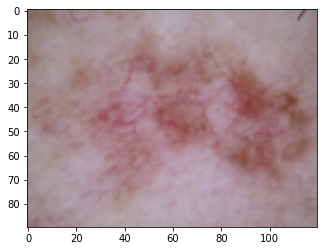

(90, 120, 3)


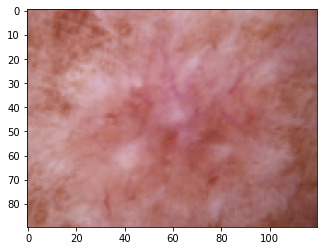

(90, 120, 3)


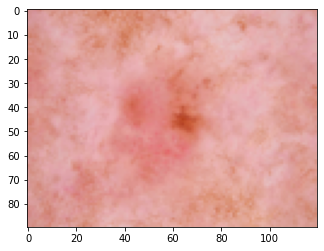

(90, 120, 3)


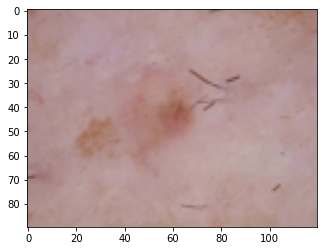

(90, 120, 3)


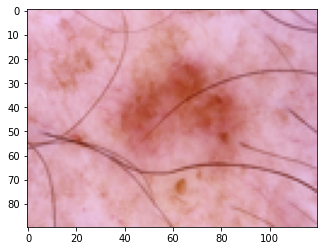

(90, 120, 3)


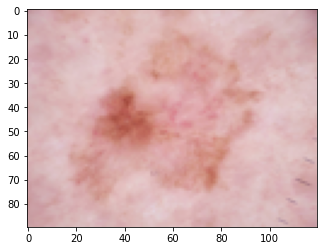

(90, 120, 3)


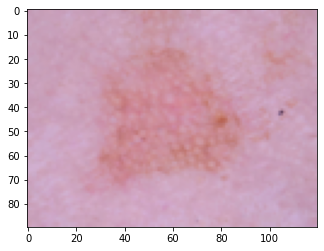

In [11]:
list = listdir('data_images/akiec')
count = 0
for f in list:
    image = Image.open('data_images/akiec/' + f)  
    image = np.asarray(image.resize((120, 90)))
    imgplot = plt.imshow(image)
    print(image.shape)
    plt.show()
    if count == 8: 
        break
    count += 1

In [7]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
         activation='relu',
         input_shape=(120, 90, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, (3,3), activation='relu'))
model.add(Conv2D(512, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

model.compile(loss = tensorflow.keras.losses.categorical_crossentropy,
              optimizer = tensorflow.keras.optimizers.Adadelta(),
              metrics = ['accuracy'])

In [4]:
epochs = 200
#model = keras.models.load_model('C:/Users/fiamm/Documents/Master_SIANI/CI/Cayetano/TrabajoFinal/modelos/modeloIntento6.h5')
#es = EarlyStopping(monitor='val_accuracy', 
#                   mode='max', 
#                   verbose=1, 
#                   patience=6, 
#                   restore_best_weights=True)

model.fit_generator(train_generator,
                    epochs = epochs,
                    validation_data = validation_generator)
#                    callbacks = [es])


C:\Users\fiamm\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/200
283/283 [==============================] - 516s 2s/step - loss: 1.9458 - accuracy: 0.1491 - val_loss: 1.9439 - val_accuracy: 0.1566
Epoch 2/200
283/283 [==============================] - 493s 2s/step - loss: 1.9437 - accuracy: 0.1589 - val_loss: 1.9422 - val_accuracy: 0.1843
Epoch 3/200
283/283 [==============================] - 502s 2s/step - loss: 1.9443 - accuracy: 0.1477 - val_loss: 1.9406 - val_accuracy: 0.1893
Epoch 4/200
283/283 [==============================] - 447s 2s/step - loss: 1.9410 - accuracy: 0.1601 - val_loss: 1.9388 - val_accuracy: 0.1872
Epoch 5/200
283/283 [==============================] - 449s 2s/step - loss: 1.9401 - accuracy: 0.1670 - val_loss: 1.9370 - val_accuracy: 0.1967
Epoch 6/200
283/283 [==============================] - 451s 2s/step - loss: 1.9373 - accuracy: 0.1763 - val_loss: 1.9347 - val_accuracy: 0.1946
Epoch 7/200
283/283 [==============================] - 451s 2s/step - loss: 1.9367 - accuracy: 0.1731 - val_loss: 1.9322 - val_accuracy:

283/283 [==============================] - 446s 2s/step - loss: 1.5748 - accuracy: 0.3949 - val_loss: 1.5593 - val_accuracy: 0.3934
Epoch 58/200
283/283 [==============================] - 441s 2s/step - loss: 1.5746 - accuracy: 0.4069 - val_loss: 1.5513 - val_accuracy: 0.3959
Epoch 59/200
283/283 [==============================] - 438s 2s/step - loss: 1.5733 - accuracy: 0.3928 - val_loss: 1.5460 - val_accuracy: 0.3983
Epoch 60/200
283/283 [==============================] - 439s 2s/step - loss: 1.5661 - accuracy: 0.4074 - val_loss: 1.5388 - val_accuracy: 0.4045
Epoch 61/200
283/283 [==============================] - 439s 2s/step - loss: 1.5620 - accuracy: 0.3923 - val_loss: 1.5331 - val_accuracy: 0.4037
Epoch 62/200
283/283 [==============================] - 439s 2s/step - loss: 1.5445 - accuracy: 0.4048 - val_loss: 1.5267 - val_accuracy: 0.4120
Epoch 63/200
283/283 [==============================] - 439s 2s/step - loss: 1.5466 - accuracy: 0.4064 - val_loss: 1.5205 - val_accuracy: 0.415

283/283 [==============================] - 467s 2s/step - loss: 1.3184 - accuracy: 0.5024 - val_loss: 1.2925 - val_accuracy: 0.5041
Epoch 114/200
283/283 [==============================] - 448s 2s/step - loss: 1.3030 - accuracy: 0.5036 - val_loss: 1.2882 - val_accuracy: 0.5062
Epoch 115/200
283/283 [==============================] - 440s 2s/step - loss: 1.2964 - accuracy: 0.4953 - val_loss: 1.2861 - val_accuracy: 0.5116
Epoch 116/200
283/283 [==============================] - 441s 2s/step - loss: 1.2900 - accuracy: 0.5121 - val_loss: 1.2838 - val_accuracy: 0.5116
Epoch 117/200
283/283 [==============================] - 441s 2s/step - loss: 1.2747 - accuracy: 0.5127 - val_loss: 1.2818 - val_accuracy: 0.5107
Epoch 118/200
283/283 [==============================] - 439s 2s/step - loss: 1.2767 - accuracy: 0.5138 - val_loss: 1.2769 - val_accuracy: 0.5132
Epoch 119/200
283/283 [==============================] - 570s 2s/step - loss: 1.2674 - accuracy: 0.5291 - val_loss: 1.2800 - val_accuracy:

KeyboardInterrupt: 

In [5]:
model.save("C:/Users/fiamm/Documents/Master_SIANI/CI/Cayetano/TrabajoFinal/modelos/modeloIntento8.h5")